<a href="https://colab.research.google.com/github/Hira63S/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Hira_LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
random.seed(42)
#dir(random)  # Reminding ourselves what we can do here


#Econometrics...play with the field. myfavorite!!
#hitchhiker's guide to the galaxy





In [23]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [24]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []#list of users

for _ in range(250): #we generate fake user data
  # Desktop users
  time_on_site = random.uniform(10, 600) #random.uniform picks a random number in a range of numbers;
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
  #first one creates desktop users
  #random.uniform: you can get a bunch of distributions with
  #this code. dektop users use the site between 10s to 600s
  #the second line...like conversion rate of 0.1 i.e. 10%
  #adding 1%for every 15 seconds spent on the site
  
  
  
  #we give mobile users are likely higher customer
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=150.42273427770718, mobile=False), User(purchased=True, time_on_site=284.06235530493245, mobile=True), User(purchased=True, time_on_site=140.37976895454653, mobile=True), User(purchased=True, time_on_site=49.206452507812216, mobile=True), User(purchased=False, time_on_site=167.81563803588924, mobile=True), User(purchased=False, time_on_site=20.484876517641524, mobile=True), User(purchased=False, time_on_site=167.3540069049869, mobile=True), User(purchased=False, time_on_site=447.75054592529114, mobile=False), User(purchased=True, time_on_site=57.93525538719398, mobile=True), User(purchased=True, time_on_site=292.6494305470663, mobile=True)]


In [25]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,150.422734,False
1,True,284.062355,True
2,True,140.379769,True
3,True,49.206453,True
4,False,167.815638,True


In [26]:
# Let's use crosstabulation to try to see what's going on
print(pd.crosstab(user_data['purchased'], user_data['time_on_site']).shape)
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

(2, 1000)


time_on_site,5.789338167851291,5.836487686604824,7.267690340465448,7.280322437947023,7.733814701629437,7.772242279186957,7.994578759409748,8.373541587279558,9.106003254765849,9.38379653305911,...,582.5363605031145,582.9362427920347,588.8783154469735,590.65747470592,593.8187768755912,597.1381204299279,597.7116143416571,598.547187832115,599.088120104121,599.5766563635087
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,1,0,1,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,1
True,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [15]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them
# we have 20% data in one bin, %20 in the next. because 5 equals 100/20%
time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

#dimension = columns in a dataframe

time_on_site,"(4.804, 124.252]","(124.252, 243.106]","(243.106, 361.959]","(361.959, 480.813]","(480.813, 599.667]"
purchased,,,,,
False,221,201,126,39,30
True,104,144,86,22,27


In [27]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.804, 124.252]","(124.252, 243.106]","(243.106, 361.959]","(361.959, 480.813]","(480.813, 599.667]"
purchased,,,,,
False,0.618462,0.64058,0.665094,0.606557,0.631579
True,0.381538,0.35942,0.334906,0.393443,0.368421


In [28]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased

#we are looking at relationship between purchases and device they used 
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.704,0.613333
True,0.296,0.386667


In [51]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

ct = pd.crosstab(user_data['mobile'], [user_data['purchased'],
            time_bins], rownames=['device'],
           colnames =["purchased", "time on site"],
            normalize ='index')

ct

purchased               False                                        \
time on site (4.804, 124.252] (124.252, 243.106] (243.106, 361.959]   
device                                                                
False                   0.228           0.204000           0.196000   
True                    0.192           0.226667           0.122667   

purchased                                                     True   \
time on site (361.959, 480.813] (480.813, 599.667] (4.804, 124.252]   
device                                                                
False                     0.052              0.024            0.088   
True                      0.032              0.040            0.136   

purchased                                                              \
time on site (124.252, 243.106] (243.106, 361.959] (361.959, 480.813]   
device                                                                  
False                  0.104000           0.060000           0.016000   
True                   0.130667           0.074667           0.026667   

purchased                        
time on site (480.813, 599.667]  
device                           
False                  0.028000  
True                   0.018667

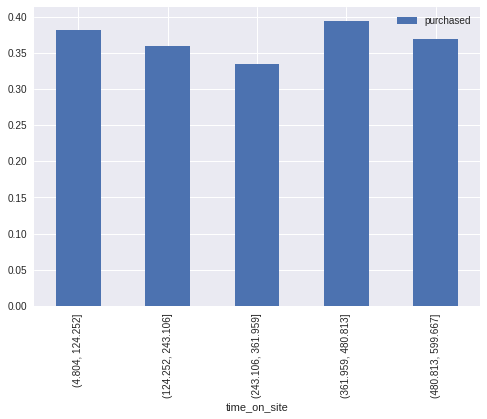

In [59]:
# create a pivot_table because time intervals aren't correct

pd.pivot_table(user_data, values='purchased', index=time_bins).plot.bar();



In [60]:
#user_data.hist(bins = 20)

({'purchased': purchased,
                'time_on_site': time_on_site}, index=time_bins)
df.plot.bar(rot=0)



TypeError: ignored

In [0]:
import 

In [32]:
help(user_data.plot)



Help on FramePlotMethods in module pandas.plotting._core object:

class FramePlotMethods(BasePlotMethods)
 |  DataFrame plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> df.plot.line()
 |  >>> df.plot.scatter('x', 'y')
 |  >>> df.plot.hexbin()
 |  
 |  These plotting methods can also be accessed by calling the accessor as a
 |  method with the ``kind`` argument:
 |  ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
 |  
 |  Method resolution order:
 |      FramePlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, font

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [72]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
import numpy as np
import pandas as pd
from statistics import mean, stdev
from google.colab import files


pupil_data = pd.read_csv('https://raw.githubusercontent.com/Hira63S/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-databackedassertions/persons.csv')

pupil_data.columns =['ID', 'age', 'weight', 'exercise_time' ]
pupil_data.head(10)


#Weight and excersice time might be correlated
#age and weight might confounding




,ID,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182
5,5,58,103,165
6,6,55,161,107
7,7,21,188,37
8,8,55,216,79
9,9,50,127,267


In [77]:
print(pd.crosstab(pupil_data['age'], pupil_data['weight']).shape)
pd.crosstab(pupil_data['age'], pupil_data['weight'])

weight_bins = pd.cut(pupil_data['weight'], 5)  # 5 equal-sized bins
pd.crosstab(pupil_data['age'], weight_bins)

age_bins = pd.cut(pupil_data['age'], 10)
pd.crosstab(age_bins, weight_bins)

(63, 143)


weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
age,,,,,
"(17.938, 24.2]",41,42,29,19,4
"(24.2, 30.4]",39,44,20,15,3
"(30.4, 36.6]",51,29,29,16,5
"(36.6, 42.8]",53,33,20,15,2
"(42.8, 49.0]",35,36,27,13,6
"(49.0, 55.2]",43,26,22,13,2
"(55.2, 61.4]",32,35,25,20,1
"(61.4, 67.6]",21,36,20,24,8
"(67.6, 73.8]",34,28,37,22,10


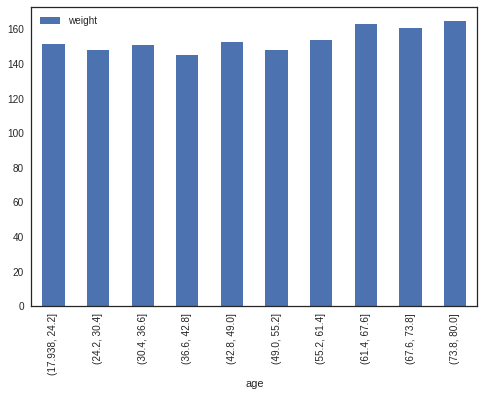

In [89]:
pd.pivot_table(pupil_data, values='weight', index=age_bins).plot.bar();

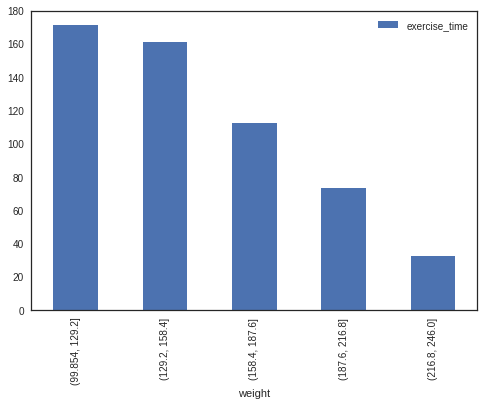

In [90]:
pd.pivot_table(pupil_data, values='exercise_time', index=weight_bins).plot.bar();

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


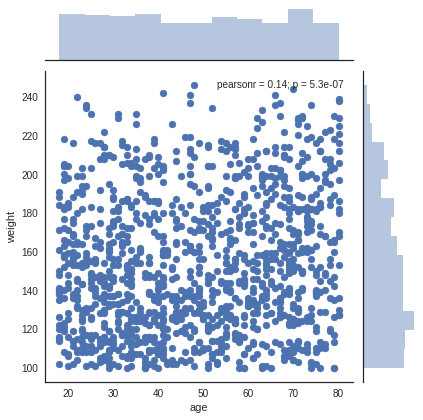

In [82]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)

sns.jointplot(x="age", y="weight", data=pupil_data, color:)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


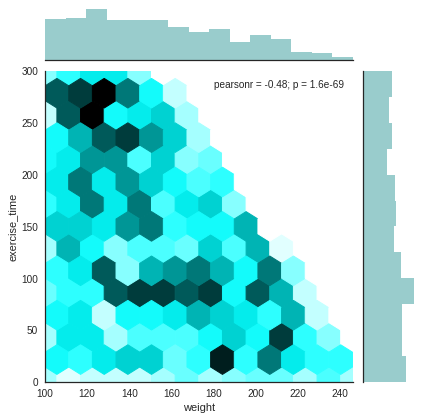

In [92]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
sns.jointplot(x="weight", y="exercise_time", data=pupil_data, kind ='hex', color = 'teal')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


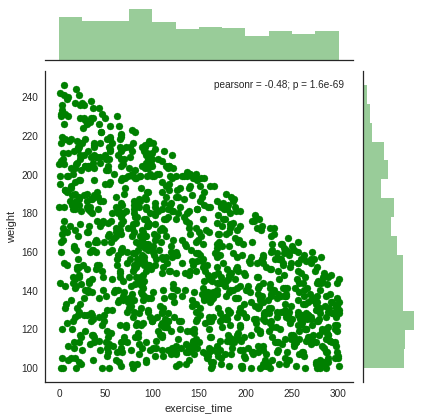

In [88]:
sns.jointplot(x="exercise_time", y="weight", data=pupil_data, color = 'green')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

They could all pass as continuous but in this specific dataset they are all discrete.

2.  What are the relationships between the variables?
So, Age and weight seems to be confounding variables. But Age and Exercise time, as well as weight and exercise had a correlation.

3.  Which relationships are "real", and which spurious?


Try boxplots


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)